# Lab | Data Cleaning and Wrangling

So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

   * We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
   * Create a copy of the dataframe for the data wrangling.
   * Normalize the continuous variables. You can use any one method you want.
   * Encode the categorical variables
   * The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
   * Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

* Hint for Categorical Variables

    You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

 1. One hot to state
 2. Ordinal to coverage
 3. Ordinal to employmentstatus
 4. Ordinal to location code
 5. One hot to marital status
 6. One hot to policy type
 7. One hot to policy
 8. One hot to renew offercustomer_df
 9. One hot to sales channel
 10. One hot vehicle class
 11. Ordinal vehicle size

 12. data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2}) given that column "coverage" in the dataframe "data" has three categories: "basic", "extended", and "premium" and values are to be represented in the same order.

## 1. Importing Dependecies & Loading the Data

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 2. Data Exploration

In [120]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [121]:
customer_df.shape

(9134, 24)

In [122]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [123]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [124]:
columns = ['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']

### 2.1. Snakecase Transformation

In [125]:
customer_df.columns = [x.lower() for x in customer_df.columns] #lowercase
customer_df.columns = customer_df.columns.str.replace("[ ]", "_", regex=True) #replacing blanks

In [126]:
customer_df.columns = customer_df.columns.str.replace('employmentstatus', 'employment_status') #adding an underscore

In [127]:
customer_df.columns #sanity check

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 2.2. Fixing Dtypes

In [128]:
#date time transformation
customer_df.effective_to_date = customer_df.effective_to_date.apply(pd.to_datetime)
#quite honestly the rest looks fine!
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

### 2.3. Correlation Matrix

In [129]:
correlation = customer_df.corr()
correlation

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


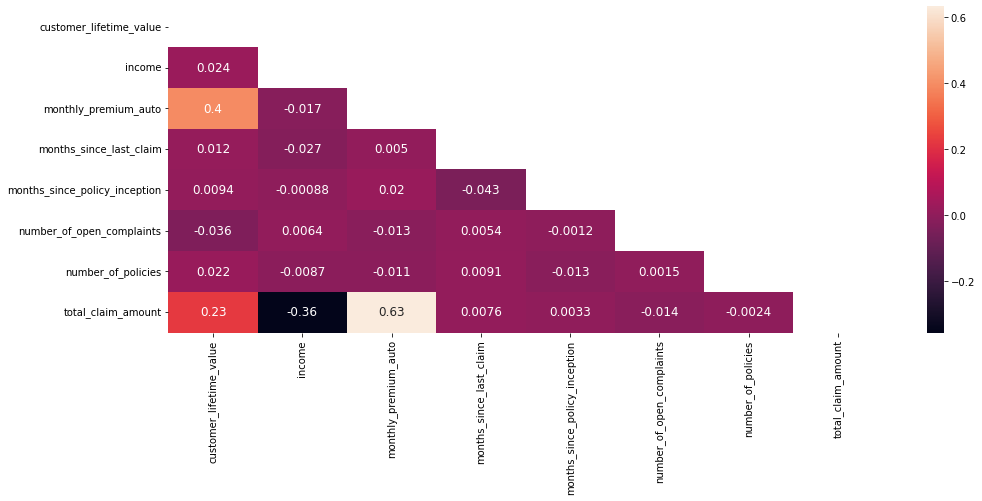

In [130]:
#now let's use a heatmap to vizualize this

mask = np.zeros_like(customer_df.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True

plt.figure(figsize=(16,6))
sns.heatmap(customer_df.corr(), annot=True, annot_kws={"size":12}, mask=mask)
plt.show()

**Comment:** From the above graph we can infer that the total_claim_amount and monthly_premium_auto features present the highest correlation (0.63). monthly_premium_auto is also relatively correlated to customer_lifetime_value (0.4). We do not observe any particularly high correlation (>0.75).

### 2.4 Continuous Variables

<Figure size 1152x432 with 0 Axes>

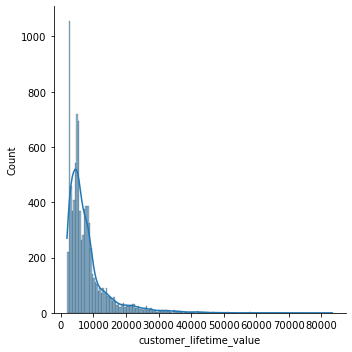

<Figure size 1152x432 with 0 Axes>

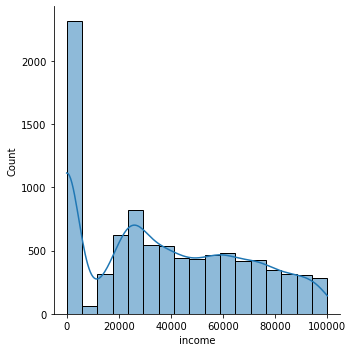

<Figure size 1152x432 with 0 Axes>

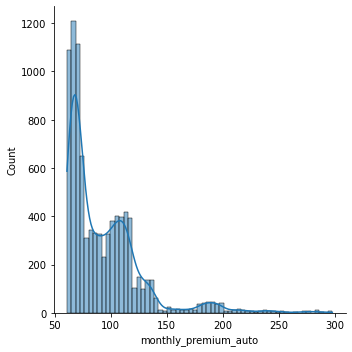

<Figure size 1152x432 with 0 Axes>

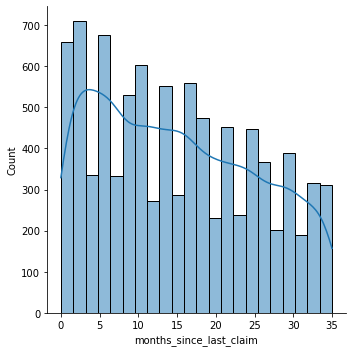

<Figure size 1152x432 with 0 Axes>

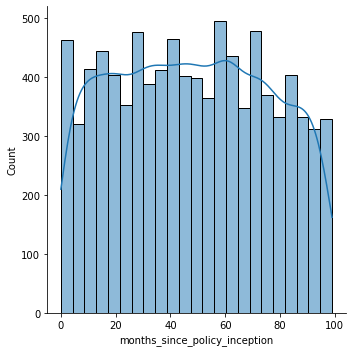

<Figure size 1152x432 with 0 Axes>

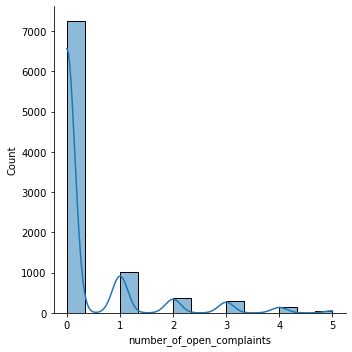

<Figure size 1152x432 with 0 Axes>

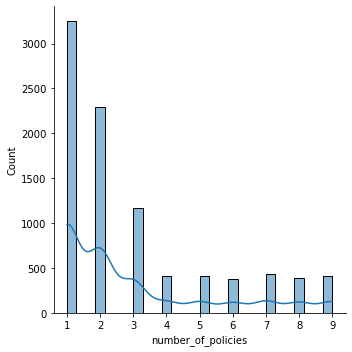

<Figure size 1152x432 with 0 Axes>

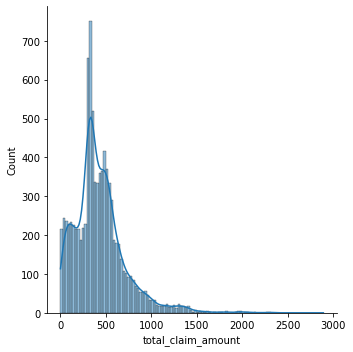

In [131]:
continuous_variables = customer_df.select_dtypes(include='number')

for variables in continuous_variables:
    plt.figure(figsize=(16,6))
    sns.displot(data=customer_df, x=customer_df[variables], kde=True)
    plt.show()

**Comment:** We notice from the graphs that these features are most likely not normally distributed as they are skewed (not Gaussian).

### 2.5 Categorical Variables

In [132]:
categoricals = customer_df.select_dtypes(exclude='number')
categoricals.drop(columns='customer', axis=1, inplace=True)

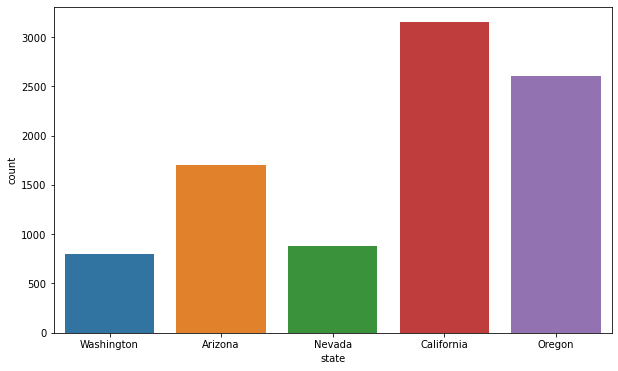

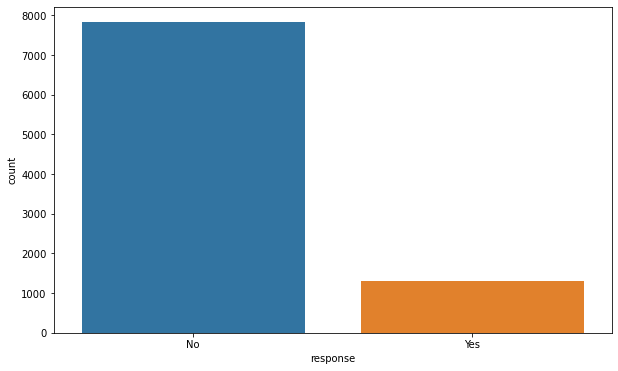

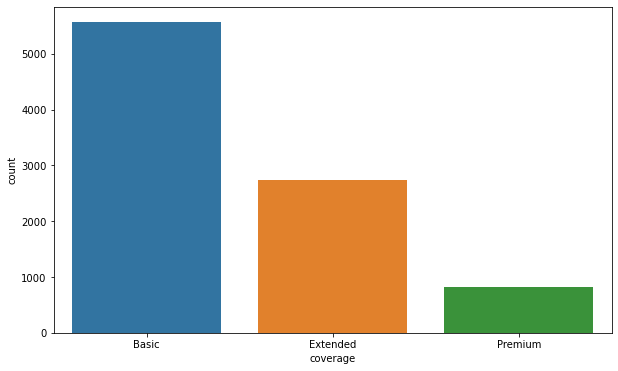

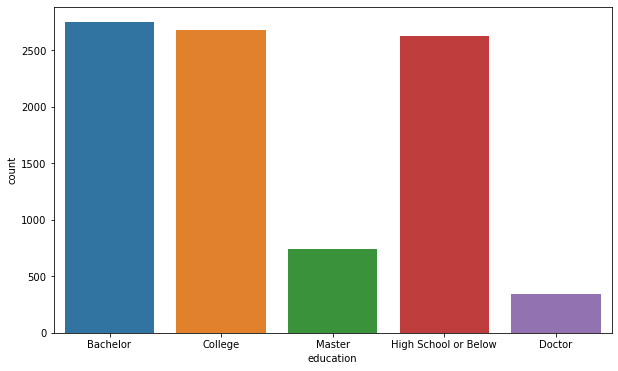

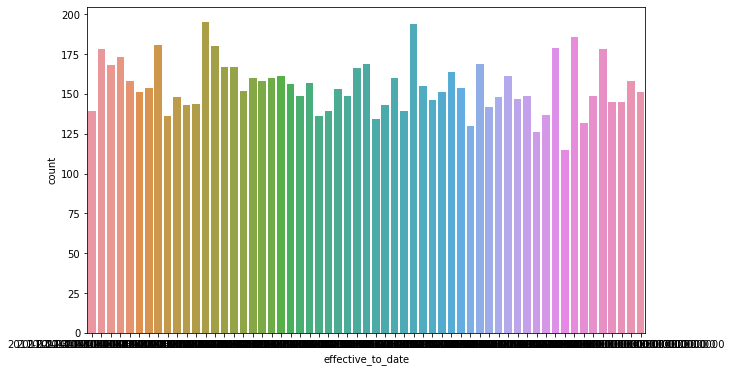

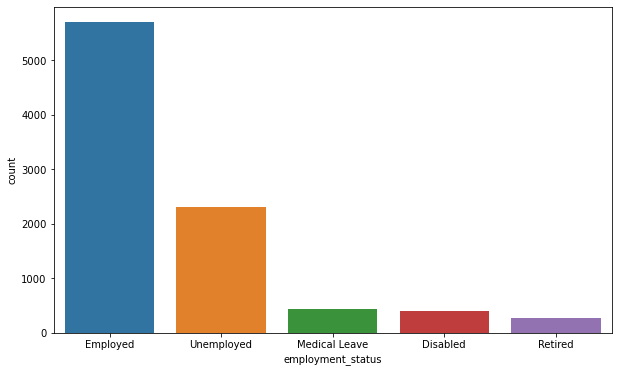

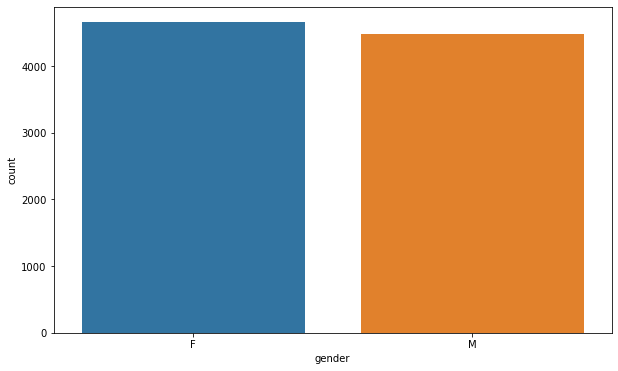

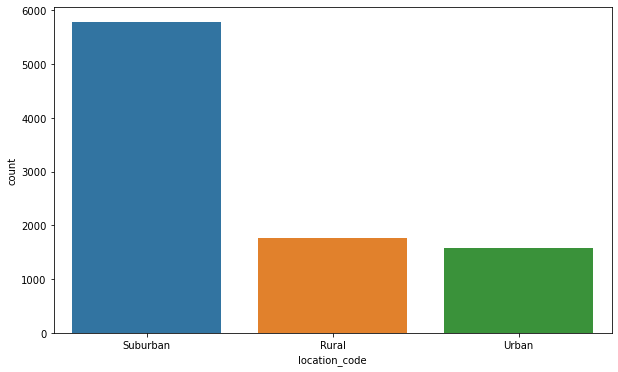

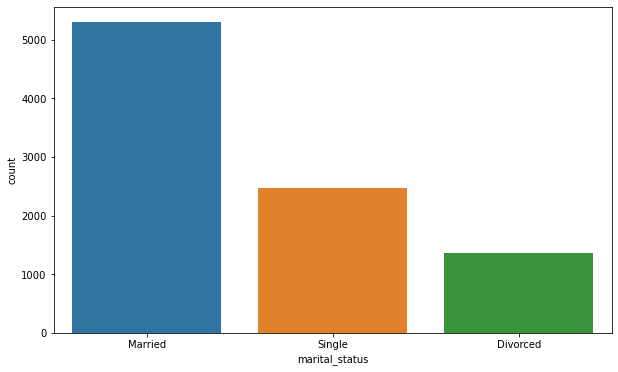

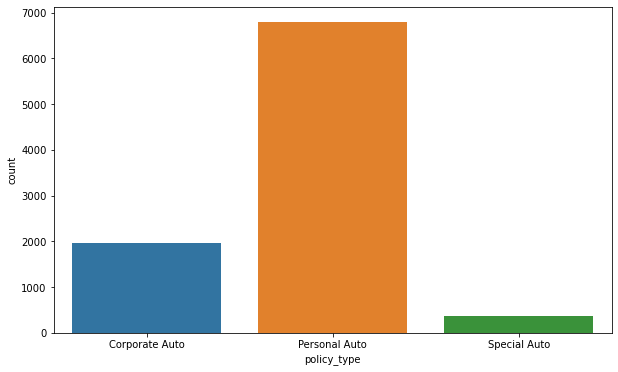

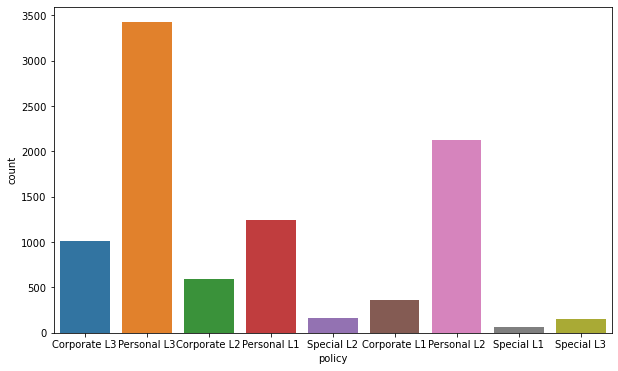

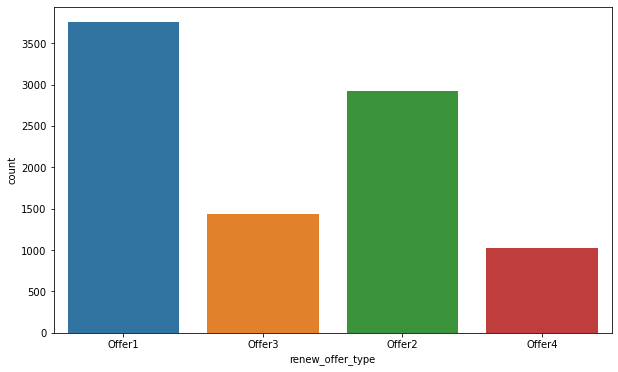

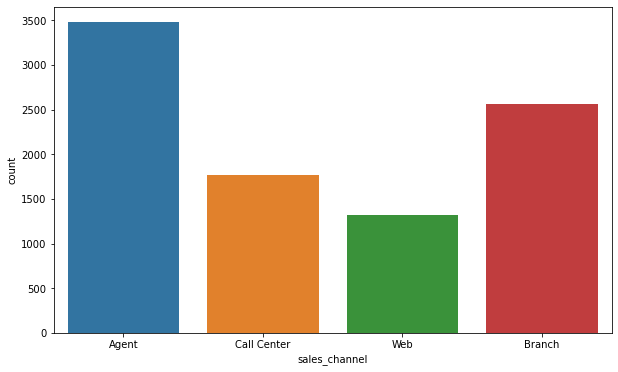

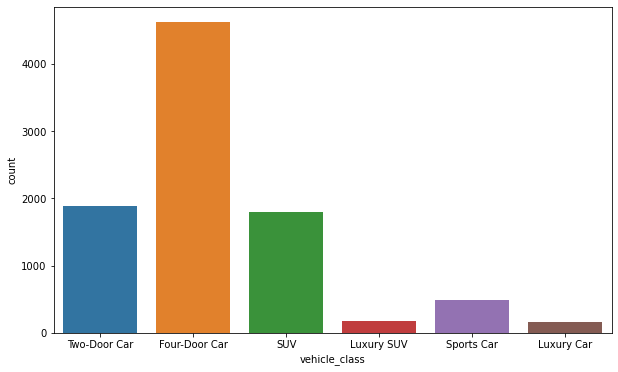

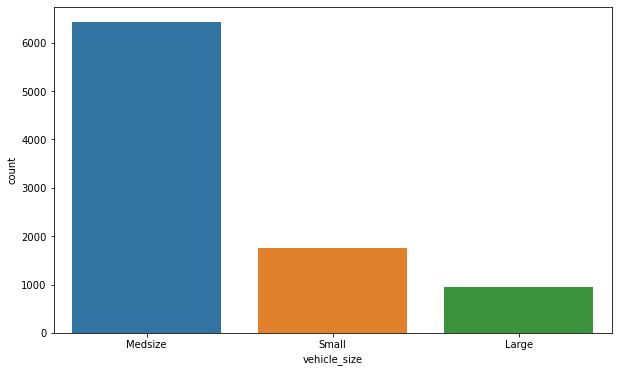

In [133]:
for variables in categoricals:
    plt.figure(figsize=(10,6))
    sns.countplot(data=customer_df, x=customer_df[variables])
    plt.show()

**Comment:** We can draw the following conclusions from the above graphs:
   * 1. Most customers are from California, with Oregon being a close second.
   * 2. The outstanding majority of people have responded no.
   * 3. Most people have the basic insurance plan, with the second one (extended coverage) having less than half customers.
   * 4. Bachelor, College and High School or Below all score very similar entries of customers.
   * 5. Most customers are employed but there are over 2000 customers who are currently unemployed.
   * 6. Female and male customers are almost equally split.
   * 7. Almost haf of our customerslive in suburban areas. Rural and urban areas have similar amount of entries.
   * 8. Most customers are currently married.
   * 9. Most customers have personal policy type. There are very few special auto policies.
   * 10. Staying on policies, most customers have a L3 or at a smaller degree a L2 policy. Corporate L3 is the most popular of its kind.
   * 11. Offer 1 is the most succesful one with offer 2 following up.
   * 12. Agents are the most succesful channel of purchases. Branch is second.
   * 13. Most people have a four-door car. With a small difference between them, second and third place are two-door cars and SUVs correspondigly.
   * 14. Finally, the vast majority of customers has a medium-sized car.

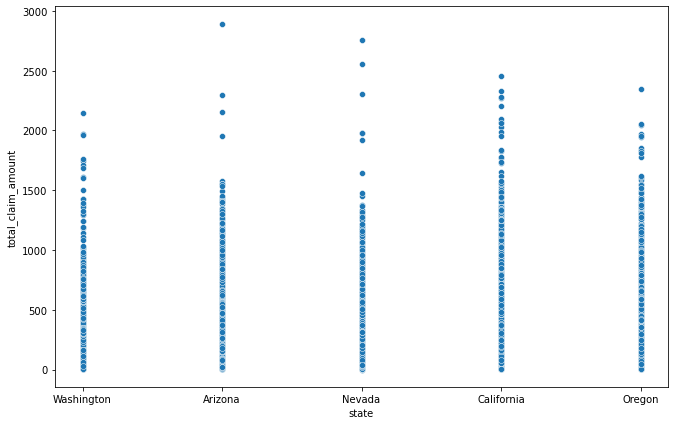

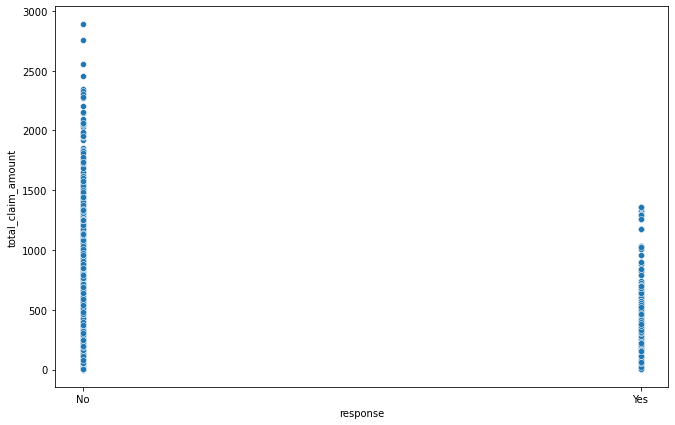

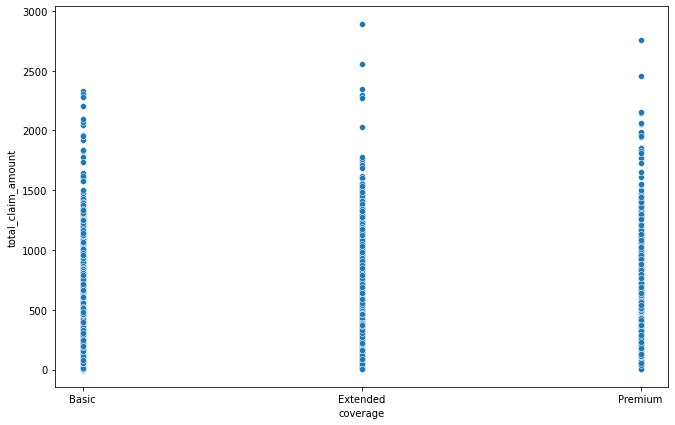

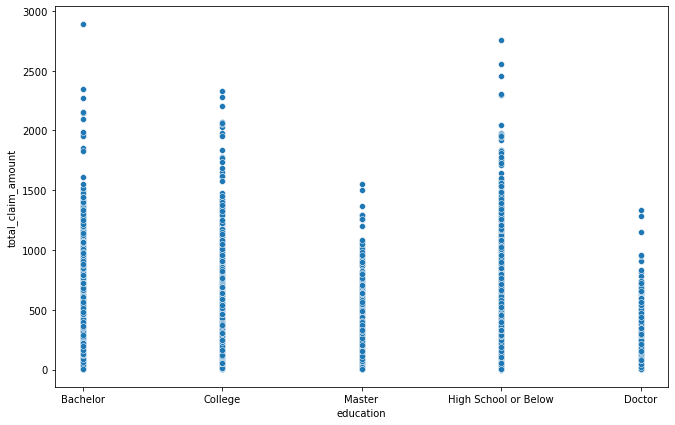

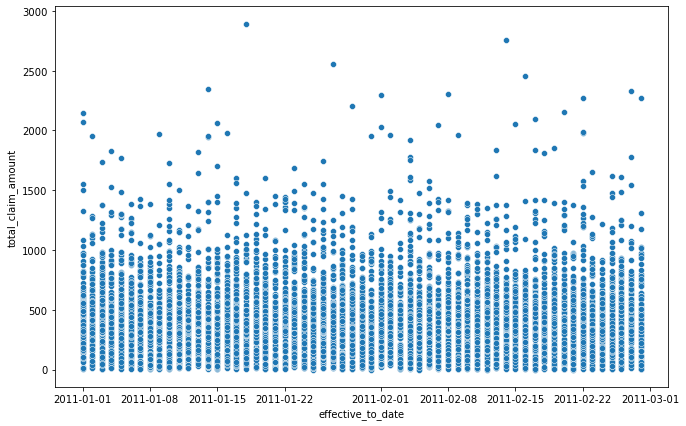

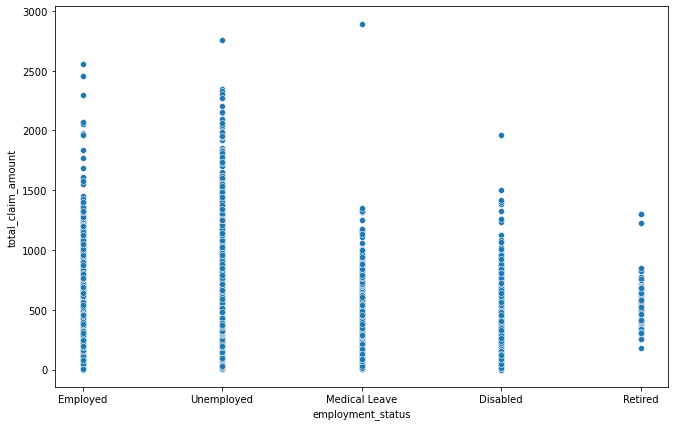

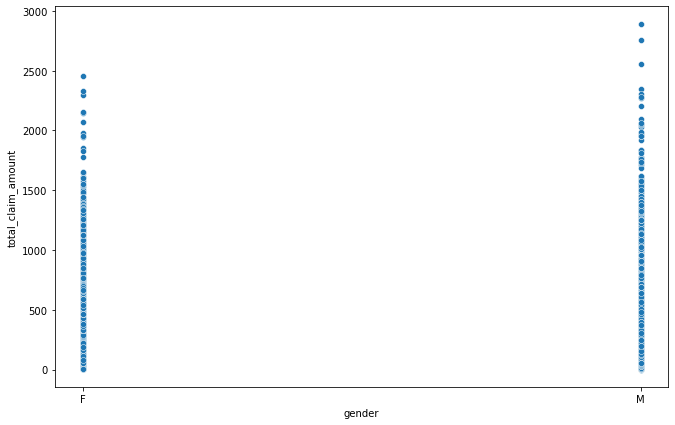

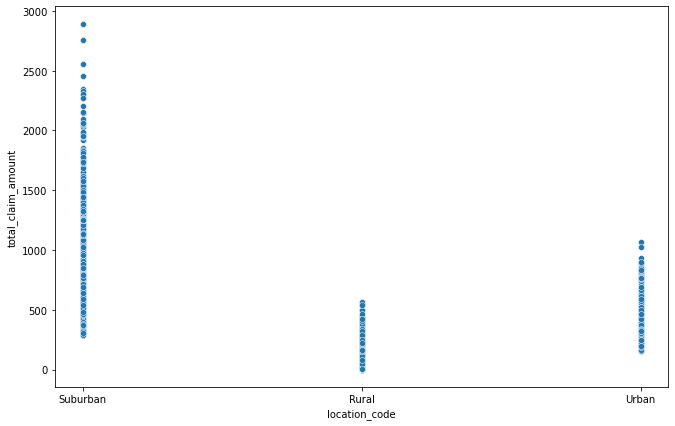

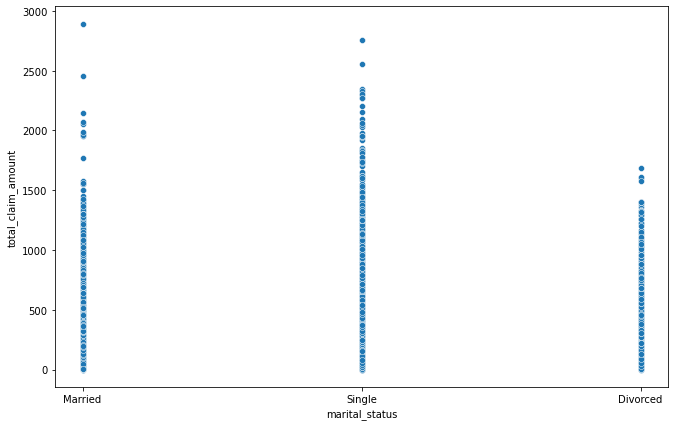

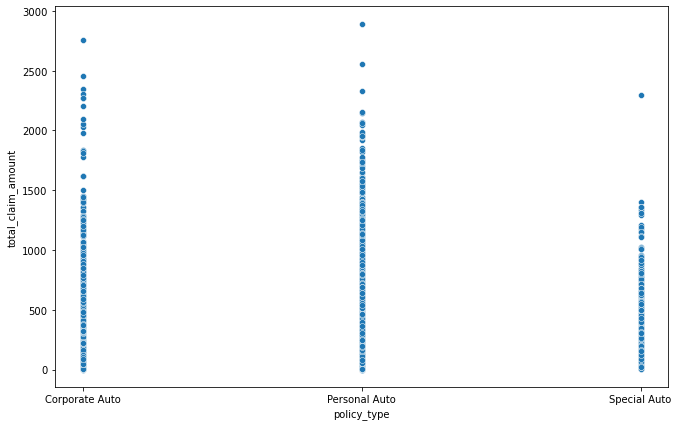

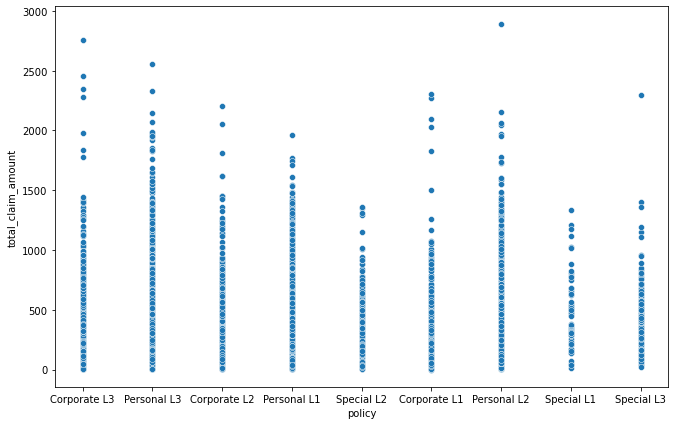

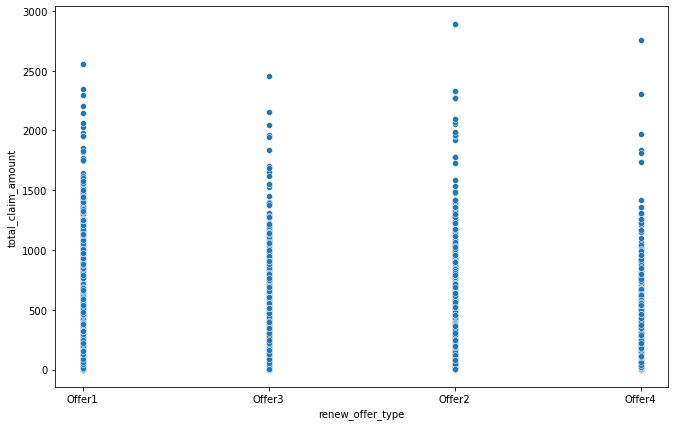

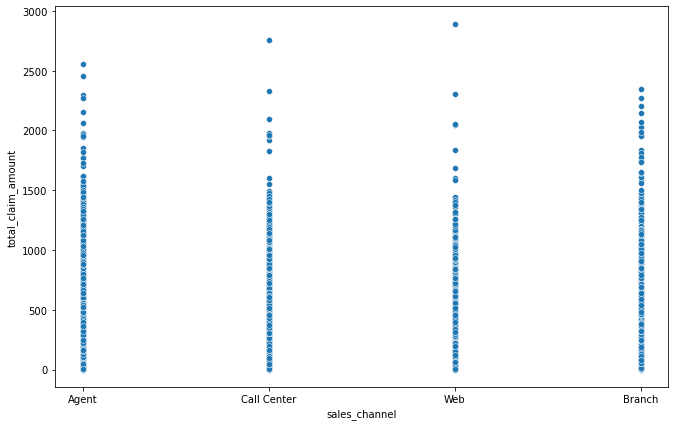

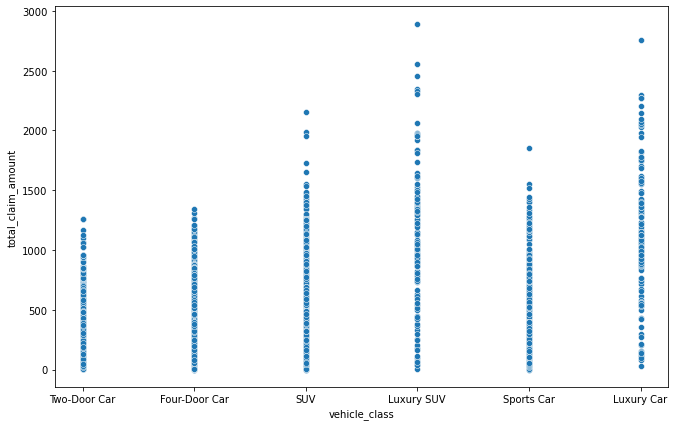

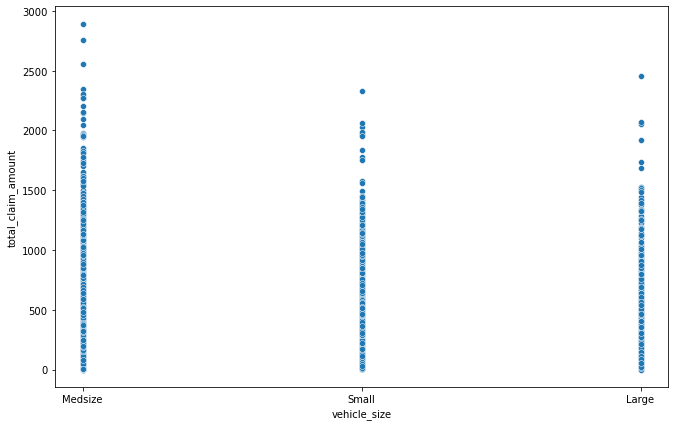

In [134]:
#we now vizualize categorical variables and the total claim amount
for columns in categoricals:
    plt.figure(figsize=(11,7))
    sns.scatterplot(data=customer_df, x=categoricals[columns], y=customer_df['total_claim_amount'])
    plt.show()

**Comment:** We can draw the following conclusions from the above scatterplots:
   * 1. Most total claim amount seem to come from California. By exception the highest amounts claimed are from Arizona and Nevada.
   * 2. The outstanding majority of the highest total claim amount is related to a no response.
   * 3. All three policies seem quite similar with extended coverage scoring the highest total amount claim point.
   * 4. Master and doctorate and holders are negatively related to total claim amount.
   * 5. Unemployed customers are accounting for a large chunk of the total claim amount.
   * 6. Males seem to score a higher total claim amount. #crash_gender_stereotypes
   * 7. Suburban areas seem to be the most profitable.
   * 8. Single people seem to be the most profitable - althought the highest total claim amount goes to married customers.
   * 9. The special auto policies are the least profitable (interesting since we know from the previous lab the their number is really small).
   * 10. Something similar can be said about L3 corporate and L3 personal since they score very high total claim amount although they are not what most customers have. 
   * 11. Offer 1 seems to e the most profitable but the highest scoring offer is offer 2 with almost 3000 total claim amount.
   * 12. Interesting that although web has the smallest count it has the highest total claim amount data point. Branch seems to be consistently profitable.
   * 13. Luxury car and luxury SUV are the most profitable despite their low numbers amongst customers.
   * 14. Medium-sized cars are the most profitable in terms of total claim amount. Interestingly, small and large cars score quite similar.

In [135]:
# Further Examination of Categorical Variables
for column in categoricals:
    print('\033[1m', column)
    print('\033[0m', categoricals[column].value_counts(dropna=False, normalize=True))

 state
 California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: state, dtype: float64
 response
 No     0.856799
Yes    0.143201
Name: response, dtype: float64
 coverage
 Basic       0.609591
Extended    0.300197
Premium     0.090212
Name: coverage, dtype: float64
 education
 Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
Name: education, dtype: float64
 effective_to_date
 2011-01-10    0.021349
2011-01-27    0.021239
2011-02-14    0.020363
2011-01-26    0.019816
2011-01-17    0.019707
2011-01-19    0.019597
2011-01-31    0.019488
2011-01-03    0.019488
2011-01-20    0.018940
2011-02-26    0.018502
2011-01-28    0.018502
2011-02-19    0.018393
2011-01-05    0.018283
2011-02-27    0.018283
2011-01-11    0.018174
2011-02-04    0.017955
2011-02-10    0.017626
2011-02-28    0.017626
2011-01-02    0.017517
2011

**Comment:** We could use some of this information above to normalize the data in case we wanted to build a model that includes any imbalanced features. If we're interested in vehicle size or class for instance it's good to know that medium size cars account for 70% of our data and four door car for over 50%. That could create certain normality issues in case we use a classification or regression task along the way.

### 2.6. Checking for Outliers

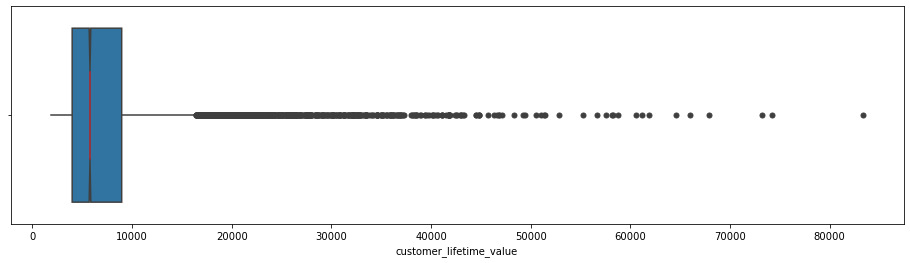

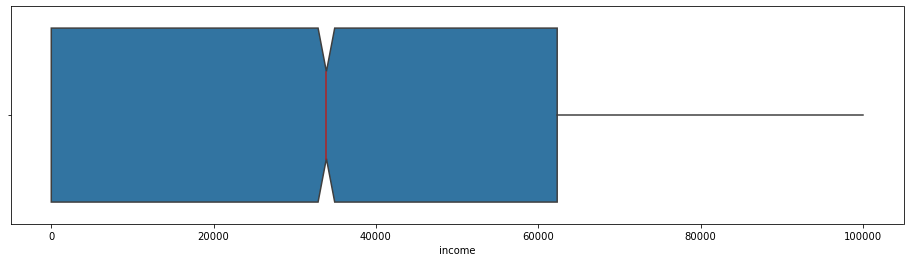

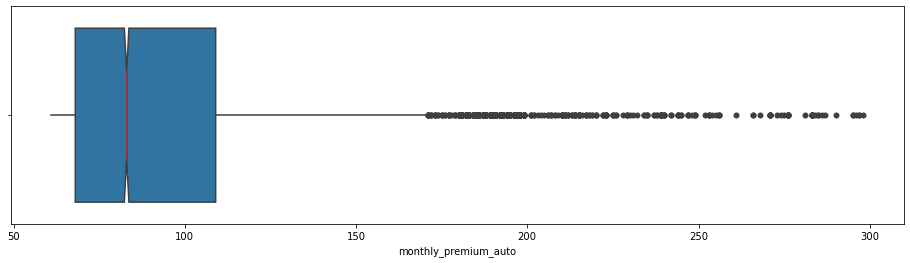

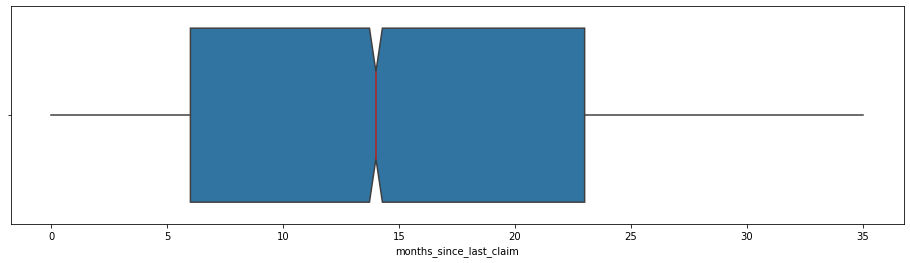

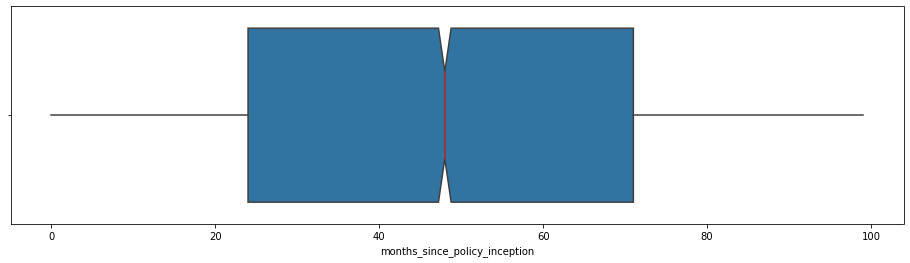

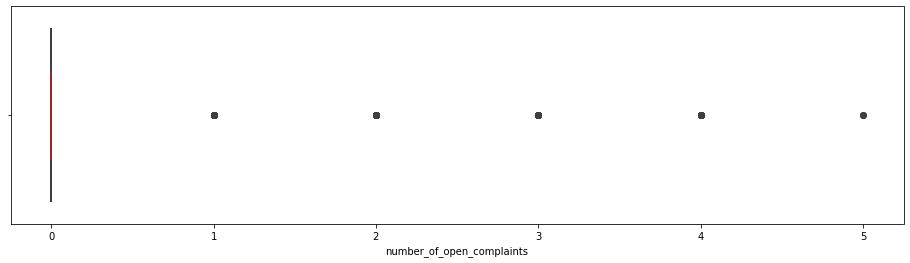

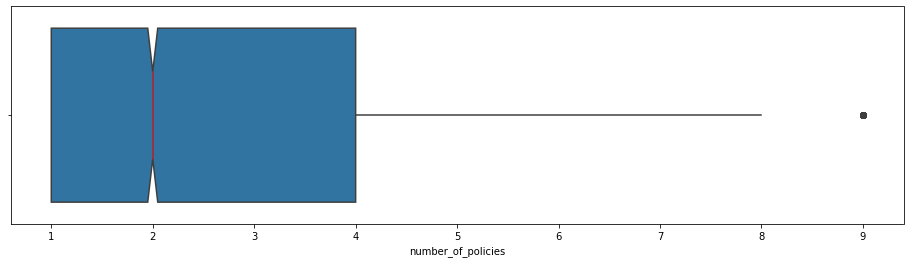

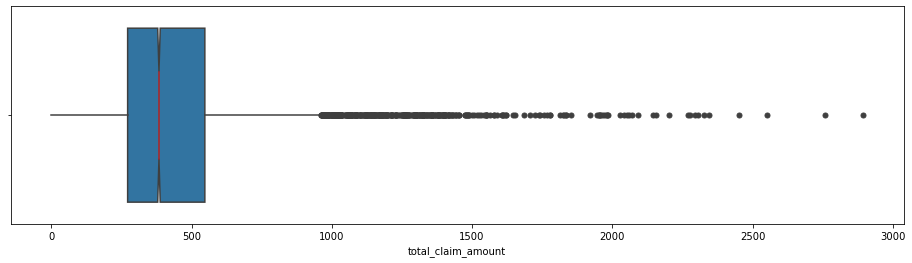

In [136]:
for variables in continuous_variables:
    plt.figure(figsize=(16,4))
    sns.boxplot(data=customer_df, x=customer_df[variables],
                notch=True, showcaps=False,
                flierprops={"marker": "o"},
                medianprops={"color": "firebrick"})
    plt.show()

**Comment:** The features customer_lifetime_value, monthly_premium_auto, total_claim_amount all have many outliers. number_of_policies and number_of_open_complaints also have outliers but very few. We could either use median imputation to replace the outliers with the median or perhaps use quantile flooring on the 90th percentile. This way, data points smaller than the 10th percentile are replaced with the 10th percentile value and the data points greater than the 90th percentile are replaced with 90th percentile value. We can, of course, also remove them (see below).

### 2.7. NaN Values

In [137]:
customer_df.isna().sum()
#no nans in our dataset

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### 2.8. Feature Extraction

In [138]:
categoricals.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [139]:
#I think that both the ploting question and deleting redundant columns (aka customer) have been adequately answered above already.

In [140]:
categoricals.effective_to_date

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

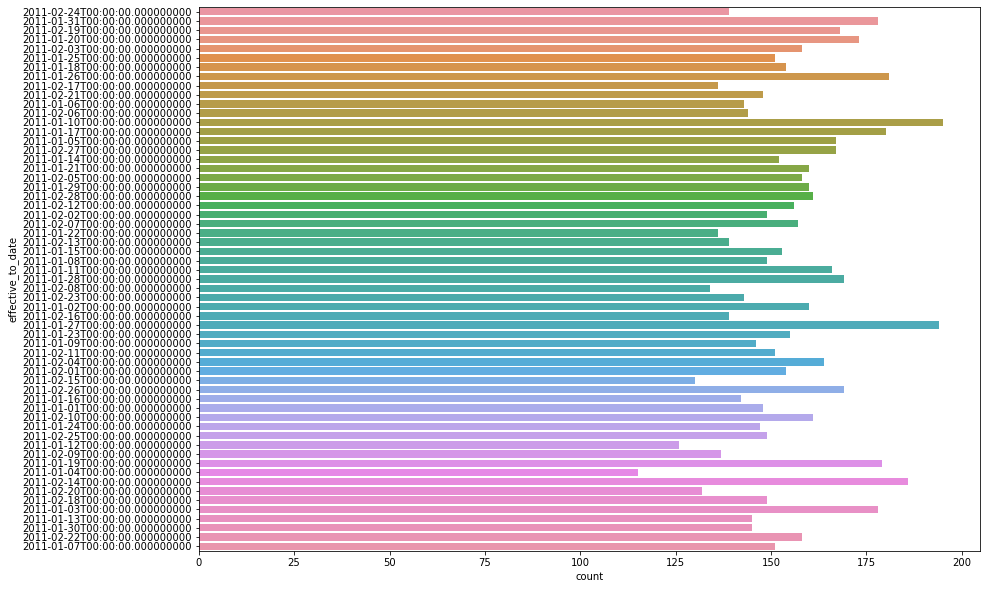

In [141]:
plt.figure(figsize=(14,10))
sns.countplot(data=categoricals, y=categoricals.effective_to_date)
plt.show()

In [142]:
#we can see from the plots above that we can extract data for January and Febrary.

In [143]:
customer_df['effective_month_2011'] = pd.DatetimeIndex(customer_df['effective_to_date']).month
customer_df.effective_month_2011
#this does the trick I would say

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: effective_month_2011, Length: 9134, dtype: int64

In [144]:
customer_df.head() #sanity check

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month_2011
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


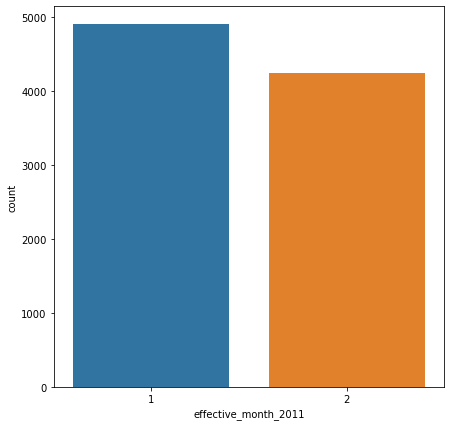

In [145]:
plt.figure(figsize=(7,7))
sns.countplot(data=customer_df, x=customer_df.effective_month_2011)
plt.show() 
#this let's us use month data more easily in case we want to build a model. But evennow, we already can plot the date data better

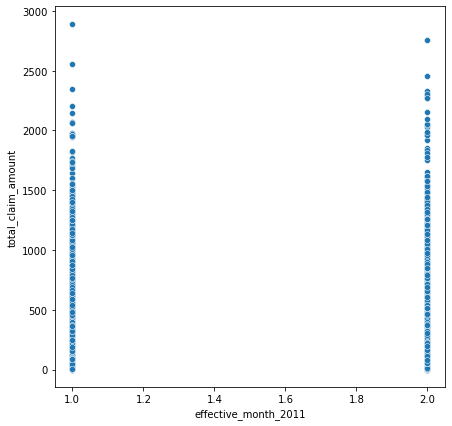

In [146]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=customer_df, x=customer_df.effective_month_2011, y=customer_df.total_claim_amount)
plt.show()
#plotting these months against our targer profit-related variable is also much more useful now.

#### ~ New Code Starts Here ~

## 3. Data Cleaning

In [147]:
customer_df['effective_day_2011'] = pd.DatetimeIndex(customer_df['effective_to_date']).day
customer_df.effective_day_2011
#this does the trick I would say. This wat we have day and month data as unique columns

0       24
1       31
2       19
3       20
4        3
        ..
9129    10
9130    12
9131     6
9132     3
9133    14
Name: effective_day_2011, Length: 9134, dtype: int64

### 3.1 Removing Outliers

In [148]:
columns_with_outliers = customer_df[['customer_lifetime_value', 
                                     'monthly_premium_auto', 
                                     'total_claim_amount', 
                                     'number_of_policies' , 
                                     'number_of_open_complaints']]

In [149]:
def remove_outliers(columns):
    for x in columns:
        q75,q25 = np.percentile(customer_df.loc[:,x],[75,25])
        intr_qr = q75-q25
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        customer_df.loc[customer_df[x] < min,x] = np.nan
        customer_df.loc[customer_df[x] > max,x] = np.nan
#this function calculates Q1 and Q3, detects outliers and replaces with null for the columns assigned.

In [150]:
remove_outliers(columns_with_outliers) #applying the function

In [151]:
customer_df.isnull().sum() #hecking for outliers

customer                            0
state                               0
customer_lifetime_value           817
response                            0
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto              430
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints        1882
number_of_policies                416
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                453
vehicle_class                       0
vehicle_size                        0
effective_month_2011                0
effective_day_2011                  0
dtype: int64

In [152]:
clean_customer_df = customer_df.dropna(axis = 0) #and now we get rid of our outliers.
clean_customer_df.isnull().sum() #sanity check

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
effective_month_2011             0
effective_day_2011               0
dtype: int64

In [153]:
clean_customer_df = clean_customer_df.drop(['customer', 'effective_to_date'], axis = 1) 
#finally, we drop these two columns as we don't need them for the final model

### 3.2 Normalizing Continuous Variables

In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
clean_customer_df.head()

,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month_2011,effective_day_2011
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3
5,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,...,2.0,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,1,25


In [156]:
y = pd.DataFrame(clean_customer_df['total_claim_amount'])
X = clean_customer_df.drop('total_claim_amount', axis=1)

print(y.columns)
print(X.columns) #sanity check that x/y split was successful

Index(['total_claim_amount'], dtype='object')
Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size',
       'effective_month_2011', 'effective_day_2011'],
      dtype='object')


In [157]:
# Creating a dataframe with the numerical values.
X_num = X.select_dtypes(include=np.number)
transformer = MinMaxScaler().fit(X_num)

In [158]:
# Normalizing the numerical data:
x_minmax = transformer.transform(X_num)

# Transforming the numpy array into the normalized dataframe 
X_num_norm = pd.DataFrame(x_minmax, columns=X_num.columns)
print(X_num_norm.head())

   customer_lifetime_value    income  monthly_premium_auto  \
0                 0.053337  0.562847              0.073394   
1                 0.755758  0.487763              0.431193   
2                 0.392086  0.000000              0.412844   
3                 0.056818  0.438443              0.110092   
4                 0.434439  0.629140              0.073394   

   months_since_last_claim  months_since_policy_inception  \
0                 0.914286                       0.050505   
1                 0.514286                       0.383838   
2                 0.514286                       0.656566   
3                 0.342857                       0.444444   
4                 0.400000                       0.949495   

   number_of_open_complaints  number_of_policies  effective_month_2011  \
0                        0.0            0.000000                   1.0   
1                        0.0            0.142857                   1.0   
2                        0.0          

### 3.3 Encoding Categorical Variables

In [159]:
from sklearn.preprocessing import OneHotEncoder

In [160]:
# Creating a dataframe with the categorical values
X_cat = X.select_dtypes(include=object)
print(X_cat.info()) #sanity check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5911 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              5911 non-null   object
 1   response           5911 non-null   object
 2   coverage           5911 non-null   object
 3   education          5911 non-null   object
 4   employment_status  5911 non-null   object
 5   gender             5911 non-null   object
 6   location_code      5911 non-null   object
 7   marital_status     5911 non-null   object
 8   policy_type        5911 non-null   object
 9   policy             5911 non-null   object
 10  renew_offer_type   5911 non-null   object
 11  sales_channel      5911 non-null   object
 12  vehicle_class      5911 non-null   object
 13  vehicle_size       5911 non-null   object
dtypes: object(14)
memory usage: 692.7+ KB
None


In [161]:
#state --> ordinal
#response --> ordinal
#gender --> ordinal
#education --> ordinal

# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

In [162]:
#now  following the lab's instructions we'll approach each columns either with a one hot encoder or ordinal encoding.

In [163]:
X_cat_onehotencoder = X_cat[['marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class' ]]
X_cat_ordinal = X_cat[['coverage', 'employment_status', 'location_code', 'vehicle_size', 'state', 'education', 'response', 'gender']]

#separating out categorical variables depending on the kind on encoding we'll use

In [164]:
#ordinal encoding
X_cat_ordinal["coverage"] = X_cat_ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_cat_ordinal["employment_status"] = X_cat_ordinal["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Disabled" : 2, "Medical Leave" : 3, "Retired" : 4 })
X_cat_ordinal["location_code"] = X_cat_ordinal["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
X_cat_ordinal["vehicle_size"] = X_cat_ordinal["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})
X_cat_ordinal["gender"] = X_cat_ordinal["gender"].map({"F" : 0, "M" : 1})
X_cat_ordinal["response"] = X_cat_ordinal["response"].map({"No" : 0, "Yes" : 1})
X_cat_ordinal["education"] = X_cat_ordinal["education"].map({"Bachelor" : 0, "College" : 1, "High School or Below" : 2, "Master" : 3, "Doctor" : 4})
X_cat_ordinal["state"] = X_cat_ordinal["state"].map({"California" : 0, "Oregon" : 1, "Arizona" : 2, "Nevada" : 3, "Washington" : 4})

print(X_cat_ordinal) # sanity check

      coverage  employment_status  location_code  vehicle_size  state  \
0            0                  0              0             0      4   
2            2                  0              0             0      3   
3            0                  1              0             0      0   
4            0                  0              1             0      4   
5            0                  0              1             0      1   
...        ...                ...            ...           ...    ...   
9127         0                  0              0             1      0   
9128         2                  0              0             2      0   
9130         1                  0              0             0      0   
9132         1                  0              0             2      0   
9133         1                  1              0             0      0   

      education  response  gender  
0             0         0       0  
2             0         0       0  
3             0

C:\Users\lazar\AppData\Local\Temp\ipykernel_5604\2439356055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_ordinal["coverage"] = X_cat_ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
C:\Users\lazar\AppData\Local\Temp\ipykernel_5604\2439356055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_ordinal["employment_status"] = X_cat_ordinal["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Disabled" : 2, "Medical Leave" : 3, "Retired" : 4 })
C:\Users\lazar\AppD

In [190]:
X_cat_ordinal = X_cat_ordinal.reset_index(drop=True) 
#resetting the index. If we don't we'll have issue when concatenating with the one hot encoder cat variables.

In [191]:
X_cat_ordinal

,coverage,employment_status,location_code,vehicle_size,state,education,response,gender
0,0,0,0,0,4,0,0,0
1,2,0,0,0,3,0,0,0
2,0,1,0,0,0,0,0,1
3,0,0,1,0,4,0,0,1
4,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
5906,0,0,0,1,0,1,0,1
5907,2,0,0,2,0,1,0,0
5908,1,0,0,0,0,1,1,0
5909,1,0,0,2,0,1,0,1


In [166]:
#one hot encoding
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat_onehotencoder)
print(type(encoder.categories_))
print(encoder.get_feature_names_out())

<class 'list'>
['marital_status_Married' 'marital_status_Single'
 'policy_type_Personal Auto' 'policy_type_Special Auto'
 'policy_Corporate L2' 'policy_Corporate L3' 'policy_Personal L1'
 'policy_Personal L2' 'policy_Personal L3' 'policy_Special L1'
 'policy_Special L2' 'policy_Special L3' 'renew_offer_type_Offer2'
 'renew_offer_type_Offer3' 'renew_offer_type_Offer4'
 'sales_channel_Branch' 'sales_channel_Call Center' 'sales_channel_Web'
 'vehicle_class_SUV' 'vehicle_class_Sports Car'
 'vehicle_class_Two-Door Car']


In [167]:
# Extracting the encoded array from the encoder
encoded = encoder.transform(X_cat_onehotencoder).toarray()

# Transform the numpy array to a Pandas dataframe
cat_one_hot_encoder = pd.DataFrame(encoded)

# Add column names to the dataframe
cat_one_hot_encoder.columns = encoder.get_feature_names_out()

In [168]:
cat_one_hot_encoder

,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5907,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5908,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [192]:
X_cat_new = pd.concat([cat_one_hot_encoder, X_cat_ordinal ], axis=1)

X_cat_new

,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,employment_status,location_code,vehicle_size,state,education,response,gender
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,4,0,0,0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2,0,0,0,3,0,0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,1
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,0,4,0,0,1
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0,0,0,1,0,1,0,1
5907,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2,0,0,2,0,1,0,0
5908,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,1,1,0
5909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1,0,0,2,0,1,0,1


In [193]:
X_cat_new.isna().sum() #making sure there have been no nan values created when we concated the dfs

marital_status_Married        0
marital_status_Single         0
policy_type_Personal Auto     0
policy_type_Special Auto      0
policy_Corporate L2           0
policy_Corporate L3           0
policy_Personal L1            0
policy_Personal L2            0
policy_Personal L3            0
policy_Special L1             0
policy_Special L2             0
policy_Special L3             0
renew_offer_type_Offer2       0
renew_offer_type_Offer3       0
renew_offer_type_Offer4       0
sales_channel_Branch          0
sales_channel_Call Center     0
sales_channel_Web             0
vehicle_class_SUV             0
vehicle_class_Sports Car      0
vehicle_class_Two-Door Car    0
coverage                      0
employment_status             0
location_code                 0
vehicle_size                  0
state                         0
education                     0
response                      0
gender                        0
dtype: int64

In [194]:
#and now we're concatenating the encoded categorical with the normalized numerical features.
X = pd.concat([X_num_norm, X_cat_new], axis=1)
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_month_2011,effective_day_2011,marital_status_Married,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,employment_status,location_code,vehicle_size,state,education,response,gender
0,0.053337,0.562847,0.073394,0.914286,0.050505,0.0,0.000000,1.0,0.766667,1.0,...,0.0,1.0,0,0,0,0,4,0,0,0
1,0.755758,0.487763,0.431193,0.514286,0.383838,0.0,0.142857,1.0,0.600000,1.0,...,0.0,1.0,2,0,0,0,3,0,0,0
2,0.392086,0.000000,0.412844,0.514286,0.656566,0.0,0.857143,0.0,0.633333,1.0,...,0.0,0.0,0,1,0,0,0,0,0,1
3,0.056818,0.438443,0.110092,0.342857,0.444444,0.0,0.000000,1.0,0.066667,0.0,...,0.0,0.0,0,0,1,0,4,0,0,1
4,0.434439,0.629140,0.073394,0.400000,0.949495,0.0,0.142857,0.0,0.800000,1.0,...,0.0,1.0,0,0,1,0,1,0,1,0


In [195]:
X.isna().sum()
#same as before, we're checking for nan values. Seems like we finally have our X encoded and normalized.

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
effective_month_2011             0
effective_day_2011               0
marital_status_Married           0
marital_status_Single            0
policy_type_Personal Auto        0
policy_type_Special Auto         0
policy_Corporate L2              0
policy_Corporate L3              0
policy_Personal L1               0
policy_Personal L2               0
policy_Personal L3               0
policy_Special L1                0
policy_Special L2                0
policy_Special L3                0
renew_offer_type_Offer2          0
renew_offer_type_Offer3          0
renew_offer_type_Offer4          0
sales_channel_Branch             0
sales_channel_Call Center        0
sales_channel_Web                0
vehicle_class_SUV                0
vehicle_class_Sports

In [197]:
X = X.select_dtypes(include="number")
X
# double checking that the entirity of X is numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_month_2011,effective_day_2011,marital_status_Married,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage,employment_status,location_code,vehicle_size,state,education,response,gender
0,0.053337,0.562847,0.073394,0.914286,0.050505,0.0,0.000000,1.0,0.766667,1.0,...,0.0,1.0,0,0,0,0,4,0,0,0
1,0.755758,0.487763,0.431193,0.514286,0.383838,0.0,0.142857,1.0,0.600000,1.0,...,0.0,1.0,2,0,0,0,3,0,0,0
2,0.392086,0.000000,0.412844,0.514286,0.656566,0.0,0.857143,0.0,0.633333,1.0,...,0.0,0.0,0,1,0,0,0,0,0,1
3,0.056818,0.438443,0.110092,0.342857,0.444444,0.0,0.000000,1.0,0.066667,0.0,...,0.0,0.0,0,0,1,0,4,0,0,1
4,0.434439,0.629140,0.073394,0.400000,0.949495,0.0,0.142857,0.0,0.800000,1.0,...,0.0,1.0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,0.210741,0.663796,0.027523,0.171429,0.484848,0.0,0.285714,1.0,0.366667,0.0,...,0.0,1.0,0,0,0,1,0,1,0,1
5907,0.146093,0.477701,0.394495,0.457143,0.585859,0.0,0.000000,0.0,0.166667,0.0,...,0.0,0.0,2,0,0,2,0,1,0,0
5908,0.076441,0.216081,0.165138,0.400000,0.282828,0.0,0.000000,1.0,0.366667,0.0,...,0.0,0.0,1,0,0,0,0,1,1,0
5909,0.383661,0.219452,0.321101,0.971429,0.030303,0.0,0.285714,1.0,0.066667,1.0,...,0.0,0.0,1,0,0,2,0,1,0,1
